In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix,roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score,plot_roc_curve

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loaded Data from drive

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset.csv")
df = df.sample(frac = 0.2)
print(df.shape)

(5376, 57)


In [ ]:
df.head()

,Unnamed: 0,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
11832,9,26.271506,1.973867,8.500154,4.988042,31.893864,-0.014178,8.229841,87.206134,-1.876705,-1.979348,-1.733052,1.159389,0.899683,1.367120,-0.197587,-0.401892,-0.052939,2125.962936,0.342197,1.981081,0.404775,1514.822328,173.500142,22.657113,0.000267,0.002333,66.858577,8.733290,-2.914335e-16,-2.559090,1.982831,57.130263,13.241229,138.463414,8.125159e+05,34014.573847,3.720153e+06,-3.122502e-17,-0.034115,0.032735,4.398321,2.046421,9.010977,4386.921373,812.441322,1.575237e+04,2.124781e+04,1800.933300,9.606988e+04,8.572618e+06,211398.604124,4.342137e+07,6.05,7.05,6.05,6.97
21060,18,-45.009574,1.999436,6.242741,10.439982,38.794747,-0.049989,13.889699,61.232771,-1.159355,-1.278092,-1.046737,0.599827,0.562617,0.723015,-0.306112,-0.396662,-0.239939,1483.539120,0.551766,2.335847,0.242217,276.923857,44.555675,13.758709,0.000875,0.005436,20.127169,6.220668,7.632783e-17,-0.381725,0.597889,43.593476,7.399321,112.276958,5.364257e+05,10623.268144,2.445656e+06,7.979728e-17,-0.086619,0.092297,10.928128,1.906274,27.976867,33590.490424,704.990008,1.518454e+05,2.167688e+05,1484.564758,1.108801e+06,5.457178e+06,53546.638450,2.695952e+07,8.95,8.10,5.85,8.12
2578,16,-3.672867,1.988580,2.189192,7.403947,33.377124,0.019098,9.138742,38.557473,-1.015407,-1.179544,-0.724668,0.682540,0.605256,0.808759,-0.377911,-0.461579,-0.304885,285.236511,0.824642,1.623997,0.039216,38.370245,18.001668,11.001184,0.001022,0.002178,3.487829,2.133661,-1.006140e-16,-0.214784,0.332078,18.998765,4.162504,60.211055,9.587706e+04,3361.943459,7.033434e+05,3.903128e-17,-0.066374,0.169274,7.458779,1.884097,24.763532,14488.738294,688.672915,1.189727e+05,8.122190e+04,1465.636289,8.469104e+05,7.657039e+05,12260.771827,6.598004e+06,9.00,7.06,5.09,6.96
10671,3,0.683134,1.993756,6.413074,39.360003,193.685947,-0.009850,46.894070,215.934234,-0.956301,-1.000554,-0.807852,0.669407,0.566981,0.699040,-0.505005,-0.526524,-0.455331,7251.044053,0.818243,1.698264,0.462433,2587.072746,710.546966,172.037800,0.000179,0.000651,15.037816,3.641610,1.387779e-16,-4.842183,4.274580,96.802144,8.605539,203.253549,2.404905e+06,14370.323059,8.019078e+06,-3.816392e-17,-0.126245,0.159562,39.005803,4.140392,80.683886,385277.034696,3325.715415,1.262923e+06,3.369337e+06,12355.926972,1.207895e+07,2.755878e+07,76015.114815,9.783061e+07,2.00,6.05,4.04,7.06
10843,7,6.947556,2.000000,0.102425,43.107080,170.816044,0.001089,50.364008,211.115688,-0.532610,-0.814839,-0.443434,0.680596,0.579041,0.704003,-0.374324,-0.470271,-0.320368,3303.569905,1.250055,1.168471,0.084283,85.913870,64.839751,454.716247,0.000981,0.001300,0.188940,1.326318,-4.996004e-16,-6.058255,5.082618,56.804527,8.174090,120.366437,8.075879e+05,12990.858081,2.817808e+06,1.457168e-16,-0.265331,0.277215,43.035306,4.776240,92.700264,473298.158110,4425.621235,1.667119e+06,4.288936e+06,16774.181690,1.635927e+07,7.636260e+06,63915.969132,2.895846e+07,1.00,6.05,2.05,1.00


## Removing the infinite values from the dataset

In [ ]:
df.shape

(5376, 57)

In [ ]:
df = df.replace([np.inf, -np.inf], np.nan)
df.head()

,Unnamed: 0,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
11832,9,26.271506,1.973867,8.500154,4.988042,31.893864,-0.014178,8.229841,87.206134,-1.876705,-1.979348,-1.733052,1.159389,0.899683,1.367120,-0.197587,-0.401892,-0.052939,2125.962936,0.342197,1.981081,0.404775,1514.822328,173.500142,22.657113,0.000267,0.002333,66.858577,8.733290,-2.914335e-16,-2.559090,1.982831,57.130263,13.241229,138.463414,8.125159e+05,34014.573847,3.720153e+06,-3.122502e-17,-0.034115,0.032735,4.398321,2.046421,9.010977,4386.921373,812.441322,1.575237e+04,2.124781e+04,1800.933300,9.606988e+04,8.572618e+06,211398.604124,4.342137e+07,6.05,7.05,6.05,6.97
21060,18,-45.009574,1.999436,6.242741,10.439982,38.794747,-0.049989,13.889699,61.232771,-1.159355,-1.278092,-1.046737,0.599827,0.562617,0.723015,-0.306112,-0.396662,-0.239939,1483.539120,0.551766,2.335847,0.242217,276.923857,44.555675,13.758709,0.000875,0.005436,20.127169,6.220668,7.632783e-17,-0.381725,0.597889,43.593476,7.399321,112.276958,5.364257e+05,10623.268144,2.445656e+06,7.979728e-17,-0.086619,0.092297,10.928128,1.906274,27.976867,33590.490424,704.990008,1.518454e+05,2.167688e+05,1484.564758,1.108801e+06,5.457178e+06,53546.638450,2.695952e+07,8.95,8.10,5.85,8.12
2578,16,-3.672867,1.988580,2.189192,7.403947,33.377124,0.019098,9.138742,38.557473,-1.015407,-1.179544,-0.724668,0.682540,0.605256,0.808759,-0.377911,-0.461579,-0.304885,285.236511,0.824642,1.623997,0.039216,38.370245,18.001668,11.001184,0.001022,0.002178,3.487829,2.133661,-1.006140e-16,-0.214784,0.332078,18.998765,4.162504,60.211055,9.587706e+04,3361.943459,7.033434e+05,3.903128e-17,-0.066374,0.169274,7.458779,1.884097,24.763532,14488.738294,688.672915,1.189727e+05,8.122190e+04,1465.636289,8.469104e+05,7.657039e+05,12260.771827,6.598004e+06,9.00,7.06,5.09,6.96
10671,3,0.683134,1.993756,6.413074,39.360003,193.685947,-0.009850,46.894070,215.934234,-0.956301,-1.000554,-0.807852,0.669407,0.566981,0.699040,-0.505005,-0.526524,-0.455331,7251.044053,0.818243,1.698264,0.462433,2587.072746,710.546966,172.037800,0.000179,0.000651,15.037816,3.641610,1.387779e-16,-4.842183,4.274580,96.802144,8.605539,203.253549,2.404905e+06,14370.323059,8.019078e+06,-3.816392e-17,-0.126245,0.159562,39.005803,4.140392,80.683886,385277.034696,3325.715415,1.262923e+06,3.369337e+06,12355.926972,1.207895e+07,2.755878e+07,76015.114815,9.783061e+07,2.00,6.05,4.04,7.06
10843,7,6.947556,2.000000,0.102425,43.107080,170.816044,0.001089,50.364008,211.115688,-0.532610,-0.814839,-0.443434,0.680596,0.579041,0.704003,-0.374324,-0.470271,-0.320368,3303.569905,1.250055,1.168471,0.084283,85.913870,64.839751,454.716247,0.000981,0.001300,0.188940,1.326318,-4.996004e-16,-6.058255,5.082618,56.804527,8.174090,120.366437,8.075879e+05,12990.858081,2.817808e+06,1.457168e-16,-0.265331,0.277215,43.035306,4.776240,92.700264,473298.158110,4425.621235,1.667119e+06,4.288936e+06,16774.181690,1.635927e+07,7.636260e+06,63915.969132,2.895846e+07,1.00,6.05,2.05,1.00


In [ ]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["coeff_var"], how="all")
df.shape

(5228, 57)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df['dominance']

11832    6.05
21060    5.85
2578     5.09
10671    4.04
10843    2.05
         ... 
24146    5.04
17621    9.00
12102    4.97
26381    6.77
13591    7.12
Name: dominance, Length: 5228, dtype: float64

# Changing the output labels to Categorical type

### We have divided into only into two classes with a threshold of 4.5.
### We can divide into thress classes or change threshold , could be our hyperparameter and we can tune to get better results

In [ ]:
df['dominance'] = np.where(df['dominance']<=3 , 1, df['dominance'])
df['valence'] = np.where(df['valence']<=3 , 1, df['valence'])
df['arousal'] = np.where(df['arousal']<=3 , 1, df['arousal'])
df['liking'] = np.where(df['liking']<=3 , 1, df['liking'])

df['dominance'] = np.where(df['dominance']>=7 , 3, df['dominance'])
df['valence'] = np.where(df['valence']>=7 , 3, df['valence'])
df['arousal'] = np.where(df['arousal']>=7 , 3, df['arousal'])
df['liking'] = np.where(df['liking']>=7 , 3, df['liking'])

df['dominance'] = np.where(df['dominance']>3 , 2, df['dominance'])
df['valence'] = np.where(df['valence']>3 , 2, df['valence'])
df['arousal'] = np.where(df['arousal']>3 , 2, df['arousal'])
df['liking'] = np.where(df['liking']> 3 , 2, df['liking'])


In [ ]:
df['dominance'].unique()

array([2., 1., 3.])

In [ ]:
# plot bar graph showing the distribution of anmomolous to non-anomolous transactions
count_classes = pd.value_counts(df['liking'], sort = True)
count_classes
# got  - 492 fraud trnasactions

2.0    2504
3.0    1745
1.0     979
Name: liking, dtype: int64

ValueError: ignored

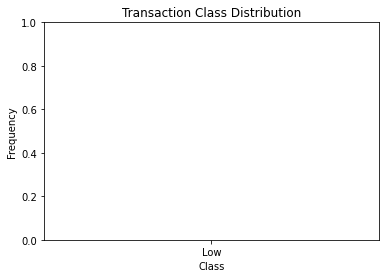

In [ ]:
names = ["Low","High"]
values = count_classes
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.bar(names,values)

In [ ]:
df.head()

In [ ]:
df.shape

## Choosing our X and Y

In [ ]:
X = df.drop(['valence','liking','dominance','arousal'],axis = 1)
X.head()

,Unnamed: 0,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
11832,9,26.271506,1.973867,8.500154,4.988042,31.893864,-0.014178,8.229841,87.206134,-1.876705,-1.979348,-1.733052,1.159389,0.899683,1.367120,-0.197587,-0.401892,-0.052939,2125.962936,0.342197,1.981081,0.404775,1514.822328,173.500142,22.657113,0.000267,0.002333,66.858577,8.733290,-2.914335e-16,-2.559090,1.982831,57.130263,13.241229,138.463414,8.125159e+05,34014.573847,3.720153e+06,-3.122502e-17,-0.034115,0.032735,4.398321,2.046421,9.010977,4386.921373,812.441322,1.575237e+04,2.124781e+04,1800.933300,9.606988e+04,8.572618e+06,211398.604124,4.342137e+07
21060,18,-45.009574,1.999436,6.242741,10.439982,38.794747,-0.049989,13.889699,61.232771,-1.159355,-1.278092,-1.046737,0.599827,0.562617,0.723015,-0.306112,-0.396662,-0.239939,1483.539120,0.551766,2.335847,0.242217,276.923857,44.555675,13.758709,0.000875,0.005436,20.127169,6.220668,7.632783e-17,-0.381725,0.597889,43.593476,7.399321,112.276958,5.364257e+05,10623.268144,2.445656e+06,7.979728e-17,-0.086619,0.092297,10.928128,1.906274,27.976867,33590.490424,704.990008,1.518454e+05,2.167688e+05,1484.564758,1.108801e+06,5.457178e+06,53546.638450,2.695952e+07
2578,16,-3.672867,1.988580,2.189192,7.403947,33.377124,0.019098,9.138742,38.557473,-1.015407,-1.179544,-0.724668,0.682540,0.605256,0.808759,-0.377911,-0.461579,-0.304885,285.236511,0.824642,1.623997,0.039216,38.370245,18.001668,11.001184,0.001022,0.002178,3.487829,2.133661,-1.006140e-16,-0.214784,0.332078,18.998765,4.162504,60.211055,9.587706e+04,3361.943459,7.033434e+05,3.903128e-17,-0.066374,0.169274,7.458779,1.884097,24.763532,14488.738294,688.672915,1.189727e+05,8.122190e+04,1465.636289,8.469104e+05,7.657039e+05,12260.771827,6.598004e+06
10671,3,0.683134,1.993756,6.413074,39.360003,193.685947,-0.009850,46.894070,215.934234,-0.956301,-1.000554,-0.807852,0.669407,0.566981,0.699040,-0.505005,-0.526524,-0.455331,7251.044053,0.818243,1.698264,0.462433,2587.072746,710.546966,172.037800,0.000179,0.000651,15.037816,3.641610,1.387779e-16,-4.842183,4.274580,96.802144,8.605539,203.253549,2.404905e+06,14370.323059,8.019078e+06,-3.816392e-17,-0.126245,0.159562,39.005803,4.140392,80.683886,385277.034696,3325.715415,1.262923e+06,3.369337e+06,12355.926972,1.207895e+07,2.755878e+07,76015.114815,9.783061e+07
10843,7,6.947556,2.000000,0.102425,43.107080,170.816044,0.001089,50.364008,211.115688,-0.532610,-0.814839,-0.443434,0.680596,0.579041,0.704003,-0.374324,-0.470271,-0.320368,3303.569905,1.250055,1.168471,0.084283,85.913870,64.839751,454.716247,0.000981,0.001300,0.188940,1.326318,-4.996004e-16,-6.058255,5.082618,56.804527,8.174090,120.366437,8.075879e+05,12990.858081,2.817808e+06,1.457168e-16,-0.265331,0.277215,43.035306,4.776240,92.700264,473298.158110,4425.621235,1.667119e+06,4.288936e+06,16774.181690,1.635927e+07,7.636260e+06,63915.969132,2.895846e+07


In [ ]:
X = X.drop(['Unnamed: 0'],axis = 1)
X.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
11832,26.271506,1.973867,8.500154,4.988042,31.893864,-0.014178,8.229841,87.206134,-1.876705,-1.979348,-1.733052,1.159389,0.899683,1.367120,-0.197587,-0.401892,-0.052939,2125.962936,0.342197,1.981081,0.404775,1514.822328,173.500142,22.657113,0.000267,0.002333,66.858577,8.733290,-2.914335e-16,-2.559090,1.982831,57.130263,13.241229,138.463414,8.125159e+05,34014.573847,3.720153e+06,-3.122502e-17,-0.034115,0.032735,4.398321,2.046421,9.010977,4386.921373,812.441322,1.575237e+04,2.124781e+04,1800.933300,9.606988e+04,8.572618e+06,211398.604124,4.342137e+07
21060,-45.009574,1.999436,6.242741,10.439982,38.794747,-0.049989,13.889699,61.232771,-1.159355,-1.278092,-1.046737,0.599827,0.562617,0.723015,-0.306112,-0.396662,-0.239939,1483.539120,0.551766,2.335847,0.242217,276.923857,44.555675,13.758709,0.000875,0.005436,20.127169,6.220668,7.632783e-17,-0.381725,0.597889,43.593476,7.399321,112.276958,5.364257e+05,10623.268144,2.445656e+06,7.979728e-17,-0.086619,0.092297,10.928128,1.906274,27.976867,33590.490424,704.990008,1.518454e+05,2.167688e+05,1484.564758,1.108801e+06,5.457178e+06,53546.638450,2.695952e+07
2578,-3.672867,1.988580,2.189192,7.403947,33.377124,0.019098,9.138742,38.557473,-1.015407,-1.179544,-0.724668,0.682540,0.605256,0.808759,-0.377911,-0.461579,-0.304885,285.236511,0.824642,1.623997,0.039216,38.370245,18.001668,11.001184,0.001022,0.002178,3.487829,2.133661,-1.006140e-16,-0.214784,0.332078,18.998765,4.162504,60.211055,9.587706e+04,3361.943459,7.033434e+05,3.903128e-17,-0.066374,0.169274,7.458779,1.884097,24.763532,14488.738294,688.672915,1.189727e+05,8.122190e+04,1465.636289,8.469104e+05,7.657039e+05,12260.771827,6.598004e+06
10671,0.683134,1.993756,6.413074,39.360003,193.685947,-0.009850,46.894070,215.934234,-0.956301,-1.000554,-0.807852,0.669407,0.566981,0.699040,-0.505005,-0.526524,-0.455331,7251.044053,0.818243,1.698264,0.462433,2587.072746,710.546966,172.037800,0.000179,0.000651,15.037816,3.641610,1.387779e-16,-4.842183,4.274580,96.802144,8.605539,203.253549,2.404905e+06,14370.323059,8.019078e+06,-3.816392e-17,-0.126245,0.159562,39.005803,4.140392,80.683886,385277.034696,3325.715415,1.262923e+06,3.369337e+06,12355.926972,1.207895e+07,2.755878e+07,76015.114815,9.783061e+07
10843,6.947556,2.000000,0.102425,43.107080,170.816044,0.001089,50.364008,211.115688,-0.532610,-0.814839,-0.443434,0.680596,0.579041,0.704003,-0.374324,-0.470271,-0.320368,3303.569905,1.250055,1.168471,0.084283,85.913870,64.839751,454.716247,0.000981,0.001300,0.188940,1.326318,-4.996004e-16,-6.058255,5.082618,56.804527,8.174090,120.366437,8.075879e+05,12990.858081,2.817808e+06,1.457168e-16,-0.265331,0.277215,43.035306,4.776240,92.700264,473298.158110,4425.621235,1.667119e+06,4.288936e+06,16774.181690,1.635927e+07,7.636260e+06,63915.969132,2.895846e+07


In [ ]:
df = df.drop(["Unnamed: 0"],axis = 1)  # removing useless column
df.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
11832,26.271506,1.973867,8.500154,4.988042,31.893864,-0.014178,8.229841,87.206134,-1.876705,-1.979348,-1.733052,1.159389,0.899683,1.367120,-0.197587,-0.401892,-0.052939,2125.962936,0.342197,1.981081,0.404775,1514.822328,173.500142,22.657113,0.000267,0.002333,66.858577,8.733290,-2.914335e-16,-2.559090,1.982831,57.130263,13.241229,138.463414,8.125159e+05,34014.573847,3.720153e+06,-3.122502e-17,-0.034115,0.032735,4.398321,2.046421,9.010977,4386.921373,812.441322,1.575237e+04,2.124781e+04,1800.933300,9.606988e+04,8.572618e+06,211398.604124,4.342137e+07,2.0,3.0,2.0,2.0
21060,-45.009574,1.999436,6.242741,10.439982,38.794747,-0.049989,13.889699,61.232771,-1.159355,-1.278092,-1.046737,0.599827,0.562617,0.723015,-0.306112,-0.396662,-0.239939,1483.539120,0.551766,2.335847,0.242217,276.923857,44.555675,13.758709,0.000875,0.005436,20.127169,6.220668,7.632783e-17,-0.381725,0.597889,43.593476,7.399321,112.276958,5.364257e+05,10623.268144,2.445656e+06,7.979728e-17,-0.086619,0.092297,10.928128,1.906274,27.976867,33590.490424,704.990008,1.518454e+05,2.167688e+05,1484.564758,1.108801e+06,5.457178e+06,53546.638450,2.695952e+07,3.0,3.0,2.0,3.0
2578,-3.672867,1.988580,2.189192,7.403947,33.377124,0.019098,9.138742,38.557473,-1.015407,-1.179544,-0.724668,0.682540,0.605256,0.808759,-0.377911,-0.461579,-0.304885,285.236511,0.824642,1.623997,0.039216,38.370245,18.001668,11.001184,0.001022,0.002178,3.487829,2.133661,-1.006140e-16,-0.214784,0.332078,18.998765,4.162504,60.211055,9.587706e+04,3361.943459,7.033434e+05,3.903128e-17,-0.066374,0.169274,7.458779,1.884097,24.763532,14488.738294,688.672915,1.189727e+05,8.122190e+04,1465.636289,8.469104e+05,7.657039e+05,12260.771827,6.598004e+06,3.0,3.0,2.0,2.0
10671,0.683134,1.993756,6.413074,39.360003,193.685947,-0.009850,46.894070,215.934234,-0.956301,-1.000554,-0.807852,0.669407,0.566981,0.699040,-0.505005,-0.526524,-0.455331,7251.044053,0.818243,1.698264,0.462433,2587.072746,710.546966,172.037800,0.000179,0.000651,15.037816,3.641610,1.387779e-16,-4.842183,4.274580,96.802144,8.605539,203.253549,2.404905e+06,14370.323059,8.019078e+06,-3.816392e-17,-0.126245,0.159562,39.005803,4.140392,80.683886,385277.034696,3325.715415,1.262923e+06,3.369337e+06,12355.926972,1.207895e+07,2.755878e+07,76015.114815,9.783061e+07,1.0,2.0,2.0,3.0
10843,6.947556,2.000000,0.102425,43.107080,170.816044,0.001089,50.364008,211.115688,-0.532610,-0.814839,-0.443434,0.680596,0.579041,0.704003,-0.374324,-0.470271,-0.320368,3303.569905,1.250055,1.168471,0.084283,85.913870,64.839751,454.716247,0.000981,0.001300,0.188940,1.326318,-4.996004e-16,-6.058255,5.082618,56.804527,8.174090,120.366437,8.075879e+05,12990.858081,2.817808e+06,1.457168e-16,-0.265331,0.277215,43.035306,4.776240,92.700264,473298.158110,4425.621235,1.667119e+06,4.288936e+06,16774.181690,1.635927e+07,7.636260e+06,63915.969132,2.895846e+07,1.0,2.0,1.0,1.0


In [ ]:
# Y consists of all 4 labels while small y consists of only one output label
Y = df[['valence','arousal','liking','dominance']]
Y.head()

,valence,arousal,liking,dominance
11832,2.0,3.0,2.0,2.0
21060,3.0,3.0,3.0,2.0
2578,3.0,3.0,2.0,2.0
10671,1.0,2.0,3.0,2.0
10843,1.0,2.0,1.0,1.0


In [ ]:
y = df['liking']
y[0:5]

11832    2.0
21060    3.0
2578     2.0
10671    3.0
10843    1.0
Name: liking, dtype: float64

In [ ]:
# converting y to np array and flattening using ravel
y = np.array(y)
y = y.ravel()
y[0:5]

array([2., 3., 2., 3., 1.])

In [ ]:
print(X.shape)
print(y.shape)

(5228, 52)
(5228,)


# Normalizing X



In [ ]:
columns = X.columns.tolist()
columns[0:5]

['coeff_var', 'fractal_dimension', 'kurtosis', 'secDiffMean', 'secDiffMax']

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(np.array(X))

In [ ]:
# Normalized dataframe
X_norm = pd.DataFrame(x_scaled)
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.562166,0.859752,0.306255,0.031944,0.097452,0.496053,0.047153,0.101118,0.105430,0.135633,0.085989,0.768062,0.761629,0.713796,0.649609,0.479259,0.700658,0.039397,0.035793,0.516525,0.011613,0.068742,0.031949,0.010972,0.003369,0.004872,0.189272,0.168491,0.375676,0.885241,0.080773,0.191849,0.305394,0.226034,0.039491,0.120253,0.054271,0.534706,0.974777,0.025021,0.025312,0.044111,0.025396,0.001159,0.004013,0.000935,0.000542,0.001306,0.000481,0.032513,0.095657,0.046624
1,0.562166,0.996974,0.228748,0.081378,0.109594,0.465444,0.089477,0.068100,0.528976,0.562802,0.487067,0.204537,0.481935,0.147869,0.489715,0.487988,0.413135,0.027437,0.238870,0.727328,0.006945,0.012533,0.008074,0.006532,0.011726,0.011549,0.056802,0.119469,0.447297,0.984603,0.022980,0.142892,0.138427,0.181538,0.026017,0.034351,0.035649,0.556310,0.931417,0.079677,0.079204,0.039324,0.091317,0.009550,0.003399,0.009311,0.005649,0.001074,0.005610,0.020681,0.023040,0.028938
2,0.562166,0.938710,0.089572,0.053850,0.100062,0.524495,0.053950,0.039274,0.613967,0.622833,0.675283,0.287835,0.517316,0.223205,0.383930,0.379639,0.313277,0.005128,0.503292,0.304345,0.001115,0.001701,0.003157,0.005156,0.013754,0.004539,0.009635,0.039729,0.412838,0.992222,0.011888,0.053942,0.045916,0.093068,0.004517,0.007684,0.010193,0.548378,0.948136,0.150312,0.050571,0.038567,0.080149,0.004061,0.003306,0.007287,0.002109,0.001060,0.004284,0.002862,0.004048,0.007063
3,0.562166,0.966491,0.234596,0.343598,0.382110,0.499752,0.336278,0.264762,0.648865,0.731864,0.626671,0.274610,0.485556,0.126804,0.196678,0.271242,0.081957,0.134811,0.497092,0.348474,0.013269,0.117429,0.131389,0.085518,0.002152,0.001253,0.042375,0.069150,0.459459,0.781054,0.176405,0.335327,0.172902,0.336125,0.117205,0.048112,0.117083,0.533356,0.898692,0.141400,0.310940,0.115628,0.274516,0.110597,0.018384,0.077691,0.087992,0.009055,0.061160,0.104622,0.033377,0.105078
4,0.562166,1.000000,0.017924,0.377573,0.341872,0.509101,0.362226,0.258637,0.899025,0.844992,0.839635,0.285878,0.495563,0.131164,0.389216,0.365132,0.289471,0.061320,0.915526,0.033671,0.002409,0.003860,0.011829,0.226584,0.013189,0.002649,0.000283,0.023978,0.335135,0.725560,0.210123,0.190671,0.160571,0.195284,0.039251,0.043046,0.041087,0.569138,0.783829,0.249361,0.344196,0.137344,0.316283,0.135888,0.024673,0.102567,0.112011,0.012299,0.082835,0.028957,0.027811,0.031086


In [ ]:
X_norm.columns = columns
X_norm.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
0,0.562166,0.859752,0.306255,0.031944,0.097452,0.496053,0.047153,0.101118,0.105430,0.135633,0.085989,0.768062,0.761629,0.713796,0.649609,0.479259,0.700658,0.039397,0.035793,0.516525,0.011613,0.068742,0.031949,0.010972,0.003369,0.004872,0.189272,0.168491,0.375676,0.885241,0.080773,0.191849,0.305394,0.226034,0.039491,0.120253,0.054271,0.534706,0.974777,0.025021,0.025312,0.044111,0.025396,0.001159,0.004013,0.000935,0.000542,0.001306,0.000481,0.032513,0.095657,0.046624
1,0.562166,0.996974,0.228748,0.081378,0.109594,0.465444,0.089477,0.068100,0.528976,0.562802,0.487067,0.204537,0.481935,0.147869,0.489715,0.487988,0.413135,0.027437,0.238870,0.727328,0.006945,0.012533,0.008074,0.006532,0.011726,0.011549,0.056802,0.119469,0.447297,0.984603,0.022980,0.142892,0.138427,0.181538,0.026017,0.034351,0.035649,0.556310,0.931417,0.079677,0.079204,0.039324,0.091317,0.009550,0.003399,0.009311,0.005649,0.001074,0.005610,0.020681,0.023040,0.028938
2,0.562166,0.938710,0.089572,0.053850,0.100062,0.524495,0.053950,0.039274,0.613967,0.622833,0.675283,0.287835,0.517316,0.223205,0.383930,0.379639,0.313277,0.005128,0.503292,0.304345,0.001115,0.001701,0.003157,0.005156,0.013754,0.004539,0.009635,0.039729,0.412838,0.992222,0.011888,0.053942,0.045916,0.093068,0.004517,0.007684,0.010193,0.548378,0.948136,0.150312,0.050571,0.038567,0.080149,0.004061,0.003306,0.007287,0.002109,0.001060,0.004284,0.002862,0.004048,0.007063
3,0.562166,0.966491,0.234596,0.343598,0.382110,0.499752,0.336278,0.264762,0.648865,0.731864,0.626671,0.274610,0.485556,0.126804,0.196678,0.271242,0.081957,0.134811,0.497092,0.348474,0.013269,0.117429,0.131389,0.085518,0.002152,0.001253,0.042375,0.069150,0.459459,0.781054,0.176405,0.335327,0.172902,0.336125,0.117205,0.048112,0.117083,0.533356,0.898692,0.141400,0.310940,0.115628,0.274516,0.110597,0.018384,0.077691,0.087992,0.009055,0.061160,0.104622,0.033377,0.105078
4,0.562166,1.000000,0.017924,0.377573,0.341872,0.509101,0.362226,0.258637,0.899025,0.844992,0.839635,0.285878,0.495563,0.131164,0.389216,0.365132,0.289471,0.061320,0.915526,0.033671,0.002409,0.003860,0.011829,0.226584,0.013189,0.002649,0.000283,0.023978,0.335135,0.725560,0.210123,0.190671,0.160571,0.195284,0.039251,0.043046,0.041087,0.569138,0.783829,0.249361,0.344196,0.137344,0.316283,0.135888,0.024673,0.102567,0.112011,0.012299,0.082835,0.028957,0.027811,0.031086


In [ ]:
X = X_norm
X.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
0,0.562166,0.859752,0.306255,0.031944,0.097452,0.496053,0.047153,0.101118,0.105430,0.135633,0.085989,0.768062,0.761629,0.713796,0.649609,0.479259,0.700658,0.039397,0.035793,0.516525,0.011613,0.068742,0.031949,0.010972,0.003369,0.004872,0.189272,0.168491,0.375676,0.885241,0.080773,0.191849,0.305394,0.226034,0.039491,0.120253,0.054271,0.534706,0.974777,0.025021,0.025312,0.044111,0.025396,0.001159,0.004013,0.000935,0.000542,0.001306,0.000481,0.032513,0.095657,0.046624
1,0.562166,0.996974,0.228748,0.081378,0.109594,0.465444,0.089477,0.068100,0.528976,0.562802,0.487067,0.204537,0.481935,0.147869,0.489715,0.487988,0.413135,0.027437,0.238870,0.727328,0.006945,0.012533,0.008074,0.006532,0.011726,0.011549,0.056802,0.119469,0.447297,0.984603,0.022980,0.142892,0.138427,0.181538,0.026017,0.034351,0.035649,0.556310,0.931417,0.079677,0.079204,0.039324,0.091317,0.009550,0.003399,0.009311,0.005649,0.001074,0.005610,0.020681,0.023040,0.028938
2,0.562166,0.938710,0.089572,0.053850,0.100062,0.524495,0.053950,0.039274,0.613967,0.622833,0.675283,0.287835,0.517316,0.223205,0.383930,0.379639,0.313277,0.005128,0.503292,0.304345,0.001115,0.001701,0.003157,0.005156,0.013754,0.004539,0.009635,0.039729,0.412838,0.992222,0.011888,0.053942,0.045916,0.093068,0.004517,0.007684,0.010193,0.548378,0.948136,0.150312,0.050571,0.038567,0.080149,0.004061,0.003306,0.007287,0.002109,0.001060,0.004284,0.002862,0.004048,0.007063
3,0.562166,0.966491,0.234596,0.343598,0.382110,0.499752,0.336278,0.264762,0.648865,0.731864,0.626671,0.274610,0.485556,0.126804,0.196678,0.271242,0.081957,0.134811,0.497092,0.348474,0.013269,0.117429,0.131389,0.085518,0.002152,0.001253,0.042375,0.069150,0.459459,0.781054,0.176405,0.335327,0.172902,0.336125,0.117205,0.048112,0.117083,0.533356,0.898692,0.141400,0.310940,0.115628,0.274516,0.110597,0.018384,0.077691,0.087992,0.009055,0.061160,0.104622,0.033377,0.105078
4,0.562166,1.000000,0.017924,0.377573,0.341872,0.509101,0.362226,0.258637,0.899025,0.844992,0.839635,0.285878,0.495563,0.131164,0.389216,0.365132,0.289471,0.061320,0.915526,0.033671,0.002409,0.003860,0.011829,0.226584,0.013189,0.002649,0.000283,0.023978,0.335135,0.725560,0.210123,0.190671,0.160571,0.195284,0.039251,0.043046,0.041087,0.569138,0.783829,0.249361,0.344196,0.137344,0.316283,0.135888,0.024673,0.102567,0.112011,0.012299,0.082835,0.028957,0.027811,0.031086


# For generating dataframe with specific input columns

### This would be useful when we train our model for reduced features

In [ ]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

# Building Model using Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def run_model(X,y):
        print(X.shape,y.shape)
        # dealing woth multiclass
        from sklearn.ensemble import RandomForestClassifier
        #model = RandomForestClassifier()
        from sklearn.multiclass import OneVsRestClassifier
        model = OneVsRestClassifier(RandomForestClassifier())

        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        #cm = 1
        #print(y_train.shape,y_pred.shape)
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test,y_pred)
        print("Accuracy" , accuracy)
        plot_confusion_matrix(cm,classes)
        print(classification_report(y_test,y_pred))
        #print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        return (y_test,y_pred)

# Confusion Matrix Plot

In [ ]:
import itertools
classes = np.array(['0','1'])
def plot_confusion_matrix(cm, classes,title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

classes = np.array(['0','1'])

    

## Before feature selection 

In [ ]:
predicts = {}
test = {}

(5228, 52) (5228,)
Accuracy 0.5515643105446119
              precision    recall  f1-score   support

         1.0       0.43      0.13      0.20       323
         2.0       0.57      0.81      0.66       813
         3.0       0.54      0.43      0.48       590

    accuracy                           0.55      1726
   macro avg       0.51      0.46      0.45      1726
weighted avg       0.53      0.55      0.51      1726



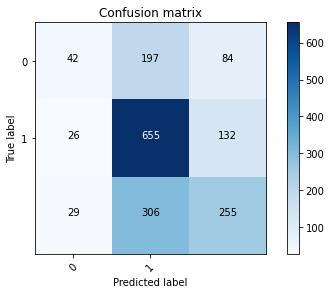

In [ ]:
(y_test,y_pred) = run_model(X,y);
predicts["Before feature selection"] = y_pred
test["Before feature selection"] = y_test

# accuracy = 59.6

In [ ]:
X.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max
0,0.562166,0.859752,0.306255,0.031944,0.097452,0.496053,0.047153,0.101118,0.105430,0.135633,0.085989,0.768062,0.761629,0.713796,0.649609,0.479259,0.700658,0.039397,0.035793,0.516525,0.011613,0.068742,0.031949,0.010972,0.003369,0.004872,0.189272,0.168491,0.375676,0.885241,0.080773,0.191849,0.305394,0.226034,0.039491,0.120253,0.054271,0.534706,0.974777,0.025021,0.025312,0.044111,0.025396,0.001159,0.004013,0.000935,0.000542,0.001306,0.000481,0.032513,0.095657,0.046624
1,0.562166,0.996974,0.228748,0.081378,0.109594,0.465444,0.089477,0.068100,0.528976,0.562802,0.487067,0.204537,0.481935,0.147869,0.489715,0.487988,0.413135,0.027437,0.238870,0.727328,0.006945,0.012533,0.008074,0.006532,0.011726,0.011549,0.056802,0.119469,0.447297,0.984603,0.022980,0.142892,0.138427,0.181538,0.026017,0.034351,0.035649,0.556310,0.931417,0.079677,0.079204,0.039324,0.091317,0.009550,0.003399,0.009311,0.005649,0.001074,0.005610,0.020681,0.023040,0.028938
2,0.562166,0.938710,0.089572,0.053850,0.100062,0.524495,0.053950,0.039274,0.613967,0.622833,0.675283,0.287835,0.517316,0.223205,0.383930,0.379639,0.313277,0.005128,0.503292,0.304345,0.001115,0.001701,0.003157,0.005156,0.013754,0.004539,0.009635,0.039729,0.412838,0.992222,0.011888,0.053942,0.045916,0.093068,0.004517,0.007684,0.010193,0.548378,0.948136,0.150312,0.050571,0.038567,0.080149,0.004061,0.003306,0.007287,0.002109,0.001060,0.004284,0.002862,0.004048,0.007063
3,0.562166,0.966491,0.234596,0.343598,0.382110,0.499752,0.336278,0.264762,0.648865,0.731864,0.626671,0.274610,0.485556,0.126804,0.196678,0.271242,0.081957,0.134811,0.497092,0.348474,0.013269,0.117429,0.131389,0.085518,0.002152,0.001253,0.042375,0.069150,0.459459,0.781054,0.176405,0.335327,0.172902,0.336125,0.117205,0.048112,0.117083,0.533356,0.898692,0.141400,0.310940,0.115628,0.274516,0.110597,0.018384,0.077691,0.087992,0.009055,0.061160,0.104622,0.033377,0.105078
4,0.562166,1.000000,0.017924,0.377573,0.341872,0.509101,0.362226,0.258637,0.899025,0.844992,0.839635,0.285878,0.495563,0.131164,0.389216,0.365132,0.289471,0.061320,0.915526,0.033671,0.002409,0.003860,0.011829,0.226584,0.013189,0.002649,0.000283,0.023978,0.335135,0.725560,0.210123,0.190671,0.160571,0.195284,0.039251,0.043046,0.041087,0.569138,0.783829,0.249361,0.344196,0.137344,0.316283,0.135888,0.024673,0.102567,0.112011,0.012299,0.082835,0.028957,0.027811,0.031086


In [ ]:
df.head()

,coeff_var,fractal_dimension,kurtosis,secDiffMean,secDiffMax,skewness,first_diff_mean,first_diff_max,AR1_mean,AR1_min,AR1_max,AR2_mean,AR2_min,AR2_max,AR3_mean,AR3_min,AR3_max,hjorth_activity,hjorth_mobility,hjorth_complexity,PMax1,PMax2,PMax3,PMax4,PRatio1,PRatio2,PRatio3,PRatio4,cA_mean_mean,cA_mean_min,cA_mean_max,cA_std_mean,cA_std_min,cA_std_max,cA_Energy_mean,cA_Energy_min,cA_Energy_max,cD_mean_mean,cD_mean_min,cD_mean_max,cD_std_mean,cD_std_min,cD_std_max,cD_Energy_mean,cD_Energy_min,cD_Energy_max,Entropy_D_mean,Entropy_D_min,Entropy_D_max,Entropy_A_mean,Entropy_A_min,Entropy_A_max,valence,arousal,dominance,liking
11832,26.271506,1.973867,8.500154,4.988042,31.893864,-0.014178,8.229841,87.206134,-1.876705,-1.979348,-1.733052,1.159389,0.899683,1.367120,-0.197587,-0.401892,-0.052939,2125.962936,0.342197,1.981081,0.404775,1514.822328,173.500142,22.657113,0.000267,0.002333,66.858577,8.733290,-2.914335e-16,-2.559090,1.982831,57.130263,13.241229,138.463414,8.125159e+05,34014.573847,3.720153e+06,-3.122502e-17,-0.034115,0.032735,4.398321,2.046421,9.010977,4386.921373,812.441322,1.575237e+04,2.124781e+04,1800.933300,9.606988e+04,8.572618e+06,211398.604124,4.342137e+07,2.0,3.0,2.0,2.0
21060,-45.009574,1.999436,6.242741,10.439982,38.794747,-0.049989,13.889699,61.232771,-1.159355,-1.278092,-1.046737,0.599827,0.562617,0.723015,-0.306112,-0.396662,-0.239939,1483.539120,0.551766,2.335847,0.242217,276.923857,44.555675,13.758709,0.000875,0.005436,20.127169,6.220668,7.632783e-17,-0.381725,0.597889,43.593476,7.399321,112.276958,5.364257e+05,10623.268144,2.445656e+06,7.979728e-17,-0.086619,0.092297,10.928128,1.906274,27.976867,33590.490424,704.990008,1.518454e+05,2.167688e+05,1484.564758,1.108801e+06,5.457178e+06,53546.638450,2.695952e+07,3.0,3.0,2.0,3.0
2578,-3.672867,1.988580,2.189192,7.403947,33.377124,0.019098,9.138742,38.557473,-1.015407,-1.179544,-0.724668,0.682540,0.605256,0.808759,-0.377911,-0.461579,-0.304885,285.236511,0.824642,1.623997,0.039216,38.370245,18.001668,11.001184,0.001022,0.002178,3.487829,2.133661,-1.006140e-16,-0.214784,0.332078,18.998765,4.162504,60.211055,9.587706e+04,3361.943459,7.033434e+05,3.903128e-17,-0.066374,0.169274,7.458779,1.884097,24.763532,14488.738294,688.672915,1.189727e+05,8.122190e+04,1465.636289,8.469104e+05,7.657039e+05,12260.771827,6.598004e+06,3.0,3.0,2.0,2.0
10671,0.683134,1.993756,6.413074,39.360003,193.685947,-0.009850,46.894070,215.934234,-0.956301,-1.000554,-0.807852,0.669407,0.566981,0.699040,-0.505005,-0.526524,-0.455331,7251.044053,0.818243,1.698264,0.462433,2587.072746,710.546966,172.037800,0.000179,0.000651,15.037816,3.641610,1.387779e-16,-4.842183,4.274580,96.802144,8.605539,203.253549,2.404905e+06,14370.323059,8.019078e+06,-3.816392e-17,-0.126245,0.159562,39.005803,4.140392,80.683886,385277.034696,3325.715415,1.262923e+06,3.369337e+06,12355.926972,1.207895e+07,2.755878e+07,76015.114815,9.783061e+07,1.0,2.0,2.0,3.0
10843,6.947556,2.000000,0.102425,43.107080,170.816044,0.001089,50.364008,211.115688,-0.532610,-0.814839,-0.443434,0.680596,0.579041,0.704003,-0.374324,-0.470271,-0.320368,3303.569905,1.250055,1.168471,0.084283,85.913870,64.839751,454.716247,0.000981,0.001300,0.188940,1.326318,-4.996004e-16,-6.058255,5.082618,56.804527,8.174090,120.366437,8.075879e+05,12990.858081,2.817808e+06,1.457168e-16,-0.265331,0.277215,43.035306,4.776240,92.700264,473298.158110,4425.621235,1.667119e+06,4.288936e+06,16774.181690,1.635927e+07,7.636260e+06,63915.969132,2.895846e+07,1.0,2.0,1.0,1.0


# Proposed Feature Selection Methods

### 1. Using Mututal Information to remove redundant features

In [ ]:
# configure to select all features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif


In [ ]:
mi = mutual_info_classif(X,y)
mi

array([0.00487746, 0.0110579 , 0.00656238, 0.02849433, 0.01922189,
       0.00253242, 0.02506294, 0.01354892, 0.00989516, 0.01422709,
       0.01072478, 0.00709201, 0.00781988, 0.01139874, 0.00229467,
       0.00101073, 0.00165112, 0.00904546, 0.01368808, 0.01092707,
       0.00150268, 0.01086535, 0.00552608, 0.0155766 , 0.00149523,
       0.001659  , 0.00735923, 0.00563388, 0.00711148, 0.00421973,
       0.00506479, 0.01352939, 0.00643504, 0.01574346, 0.00529722,
       0.00123343, 0.01134663, 0.00492316, 0.00361183, 0.00641036,
       0.02529262, 0.01559944, 0.01932932, 0.02643449, 0.01792346,
       0.02038382, 0.02784432, 0.01385005, 0.02525668, 0.01426377,
       0.01059595, 0.01966852])

In [ ]:
np.sort(mi)

array([0.00101073, 0.00123343, 0.00149523, 0.00150268, 0.00165112,
       0.001659  , 0.00229467, 0.00253242, 0.00361183, 0.00421973,
       0.00487746, 0.00492316, 0.00506479, 0.00529722, 0.00552608,
       0.00563388, 0.00641036, 0.00643504, 0.00656238, 0.00709201,
       0.00711148, 0.00735923, 0.00781988, 0.00904546, 0.00989516,
       0.01059595, 0.01072478, 0.01086535, 0.01092707, 0.0110579 ,
       0.01134663, 0.01139874, 0.01352939, 0.01354892, 0.01368808,
       0.01385005, 0.01422709, 0.01426377, 0.0155766 , 0.01559944,
       0.01574346, 0.01792346, 0.01922189, 0.01932932, 0.01966852,
       0.02038382, 0.02506294, 0.02525668, 0.02529262, 0.02643449,
       0.02784432, 0.02849433])

In [ ]:
mi.argsort()[-34:][::-1]

array([ 3, 46, 43, 40, 48,  6, 45, 51, 42,  4, 44, 33, 41, 23, 49,  9, 47,
       18,  7, 31, 13, 36,  1, 19, 21, 10, 50,  8, 17, 12, 26, 28, 11,  2])

In [ ]:
arr = mi
ind = arr.argsort()[-40:][::-1]
ser =  X.columns
features = ser[ind]
print(features)
new_X = select_columns(X,features)

Index(['secDiffMean', 'Entropy_D_mean', 'cD_Energy_mean', 'cD_std_mean',
       'Entropy_D_max', 'first_diff_mean', 'cD_Energy_max', 'Entropy_A_max',
       'cD_std_max', 'secDiffMax', 'cD_Energy_min', 'cA_std_max', 'cD_std_min',
       'PMax4', 'Entropy_A_mean', 'AR1_min', 'Entropy_D_min',
       'hjorth_mobility', 'first_diff_max', 'cA_std_mean', 'AR2_max',
       'cA_Energy_max', 'fractal_dimension', 'hjorth_complexity', 'PMax2',
       'AR1_max', 'Entropy_A_min', 'AR1_mean', 'hjorth_activity', 'AR2_min',
       'PRatio3', 'cA_mean_mean', 'AR2_mean', 'kurtosis', 'cA_std_min',
       'cD_mean_max', 'PRatio4', 'PMax3', 'cA_Energy_mean', 'cA_mean_max'],
      dtype='object')


(26136, 40) (26136,)
Accuracy 0.6001159420289855
              precision    recall  f1-score   support

         1.0       0.54      0.25      0.34      1637
         2.0       0.61      0.82      0.70      4169
         3.0       0.60      0.49      0.54      2819

    accuracy                           0.60      8625
   macro avg       0.58      0.52      0.52      8625
weighted avg       0.59      0.60      0.58      8625



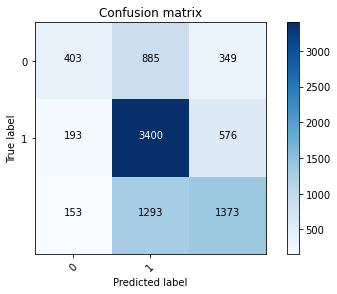

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
predicts["mi"] = y_pred 
test["mi"] = y_test

In [ ]:
fs = SelectKBest(score_func=mutual_info_classif, k=42)   # removing 10 redundant features
# learn relationship from training data
fs.fit(X, y)
# transform train input data
X_fs = fs.transform(X)
features = X.columns[(fs.get_support())]
new_X = select_columns(X,features)

(y_test,y_pred) = run_model(new_X,y);
test["MI"] = y_test
predicts["MI"] = y_pred     
# accuracy - 67.5%

# Using Boruta

In [ ]:
!pip install boruta
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np
###initialize Boruta
forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 8
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 40 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(new_X), y)
### print results
green_area = new_X.columns[boruta.support_].to_list()
blue_area = new_X.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)


     |████████████████████████████████| 61kB 3.6MB/s 
features in the green area: ['fractal_dimension', 'kurtosis', 'secDiffMean', 'secDiffMax', 'first_diff_mean', 'first_diff_max', 'AR1_mean', 'AR1_min', 'AR1_max', 'AR2_mean', 'AR2_min', 'AR2_max', 'hjorth_activity', 'hjorth_mobility', 'hjorth_complexity', 'PMax2', 'PMax3', 'PMax4', 'PRatio3', 'PRatio4', 'cA_mean_min', 'cA_mean_max', 'cA_std_mean', 'cA_std_min', 'cA_std_max', 'cA_Energy_mean', 'cA_Energy_max', 'cD_std_mean', 'cD_std_min', 'cD_std_max', 'cD_Energy_mean', 'cD_Energy_min', 'cD_Energy_max', 'Entropy_D_mean', 'Entropy_D_min', 'Entropy_D_max', 'Entropy_A_mean', 'Entropy_A_min', 'Entropy_A_max']
features in the blue area: []


(26136, 25) (26136,)
Accuracy 0.5942028985507246
              precision    recall  f1-score   support

         1.0       0.51      0.26      0.35      1637
         2.0       0.61      0.79      0.69      4169
         3.0       0.59      0.50      0.54      2819

    accuracy                           0.59      8625
   macro avg       0.57      0.52      0.52      8625
weighted avg       0.58      0.59      0.57      8625



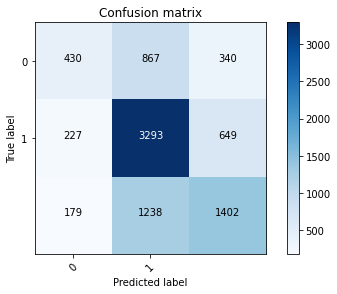

In [ ]:
feat = boruta.support_
'''
ind = np.where(feat==1)
ser =  new_X.columns
features = ser[ind]
new_XX = select_columns(new_X,features)
'''

rank = boruta.ranking_   # best feature has rank 1
inds = rank.argsort()[0:25]
ser =  new_X.columns
features = ser[inds]
new_XX = select_columns(new_X,features)

(y_test,y_pred) = run_model(new_XX,y);
predicts["Boruta"] = y_pred 
test["Boruta"] = y_test
# accuracy - 67.5% - 38 features
#  67.57 - 33 features

# RFE

In [ ]:
print(new_XX.shape)
new_XX.head()

(26136, 20)


,AR3_min,Entropy_A_mean,Entropy_D_mean,skewness,kurtosis,cA_std_mean,AR3_max,AR1_mean,PRatio4,PRatio2,AR2_min,hjorth_complexity,AR1_min,cA_Energy_mean,AR3_mean,secDiffMax,cA_mean_min,cD_std_mean,cA_std_max,cD_std_min
0,0.342121,0.000326,0.001146,0.485496,0.030077,0.018292,0.255645,0.724688,0.008586,0.003349,0.445797,0.145995,0.687414,0.000686,0.269042,0.120741,0.992746,0.039008,0.023490,0.026032
1,0.368339,0.002370,0.003131,0.475193,0.129534,0.051844,0.383652,0.665895,0.037501,0.003425,0.455001,0.335798,0.637721,0.003761,0.314959,0.131236,0.973665,0.063816,0.063572,0.041504
2,0.388196,0.001111,0.001514,0.527679,0.053308,0.035709,0.281158,0.614474,0.012374,0.000694,0.466124,0.240465,0.659541,0.001990,0.307996,0.125660,0.994857,0.044034,0.053619,0.029825
3,0.299236,0.000509,0.001907,0.527256,0.018495,0.024148,0.302467,0.767878,0.018553,0.002458,0.487635,0.109339,0.719781,0.001037,0.285184,0.129882,0.988159,0.049951,0.032008,0.028877
4,0.513598,0.002868,0.000904,0.495048,0.167490,0.056952,0.715080,0.506503,0.033340,0.001750,0.483220,0.460057,0.444139,0.004446,0.569984,0.126643,0.973406,0.034175,0.067179,0.030393


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model = RandomForestClassifier()
#model = LogisticRegression()

selector = RFE(model,n_features_to_select=15, step=1)
selector.fit(new_XX,y)


RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

(26136, 15) (26136,)
Accuracy 0.591304347826087
              precision    recall  f1-score   support

         1.0       0.53      0.25      0.34      1637
         2.0       0.61      0.80      0.69      4169
         3.0       0.58      0.48      0.53      2819

    accuracy                           0.59      8625
   macro avg       0.57      0.51      0.52      8625
weighted avg       0.58      0.59      0.57      8625



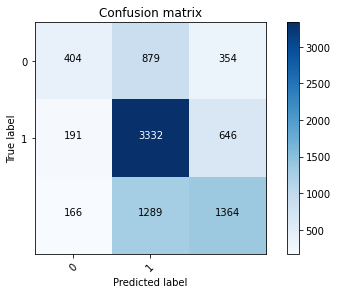

In [ ]:
selected_feat = new_XX.columns[(selector.get_support())]
new_XXX = select_columns(new_XX,selected_feat)
(y_test,y_pred) = run_model(new_XXX,y);

test["Recursive Feature Elimination"] = y_test
predicts["Recursive Feature Elimination"] = y_pred
# 20 features - 

(26136, 10) (26136,)
Accuracy 0.5846956521739131
              precision    recall  f1-score   support

         1.0       0.53      0.27      0.35      1637
         2.0       0.60      0.78      0.68      4169
         3.0       0.56      0.48      0.52      2819

    accuracy                           0.58      8625
   macro avg       0.56      0.51      0.52      8625
weighted avg       0.58      0.58      0.57      8625



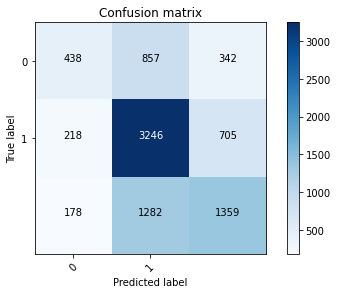

In [ ]:
# 10 FEATURES

selector = RFE(model,n_features_to_select=10, step=1)
selector.fit(new_XX,y)
selected_feat = new_XX.columns[(selector.get_support())]
new_XXX = select_columns(new_XX,selected_feat)
(y_test,y_pred) = run_model(new_XXX,y);
test["Recursive Feature Elimination"] = y_test
predicts["Recursive Feature Elimination"] = y_pred

# EVEN WITH 5 FEATURES ACCURACY - 66.8%

# SatyLasso Regularisation

In [ ]:
# Importing libraries 

import numpy as np 

import pandas as pd 

from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt 

# Lasso Regression 
class SatyLassoRegression():
  def __init__( self, learning_rate, iterations, l0_penality,l1_penality,l2_penality ):
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.l0_penality = l0_penality
    self.l1_penality = l1_penality
    self.l2_penality = l2_penality
  
  def fit( self, X, Y ):
    self.m, self.n = X.shape
    self.W = np.zeros( self.n )
    self.b = 0
    self.X = X
    self.Y = Y
    
    for i in range( self.iterations ):
      self.update_weights()
    return self
  
  def update_weights( self ):
    Y_pred,wt = self.predict( self.X )
    dW = np.zeros( self.n )

    for j in range( self.n ):
      if self.W[j] > 0:
        #dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred )) + self.l1_penality + 1 + 2*self.l2_penality*self.W[j]) / self.m 
        dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred )) + self.l1_penality + 1 + 2*self.l2_penality*self.W[j]) / self.m
        #dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) )  + self.l1_penality ) / self.m
      elif self.W[j] == 0:
        dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) + self.l1_penality) / self.m
      else:
        dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) - self.l1_penality + 1 - 2*self.l2_penality*self.W[j]) / self.m 
        #dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) )   - self.l1_penality ) / self.m 
                 
    db = - 2 * np.sum( self.Y - Y_pred ) / self.m
    # update weights 
    self.W = self.W - self.learning_rate * dW
    self.b = self.b - self.learning_rate * db
    #print(self.W,self.b) 
    return self
  def predict( self, X ):
    return (X.dot( self.W ) + self.b,self.W)


In [ ]:
# Importing libraries 

import numpy as np 

import pandas as pd 

from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt 

# Lasso Regression 
class SatyLassoRegression1():
  def __init__( self, learning_rate, iterations, l0_penality,l1_penality,l2_penality ):
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.l0_penality = l0_penality
    self.l1_penality = l1_penality
    self.l2_penality = l2_penality
  
  def fit( self, X, Y ):
    self.m, self.n = X.shape
    self.W = np.ones( self.n )
    self.b = 0
    self.X = X
    self.Y = Y
    
    for i in range( self.iterations ):
      self.update_weights()
    return self
  
  def update_weights( self ):
    Y_pred,wt = self.predict( self.X )
    dW = np.zeros( self.n )
    sum=0
    for j in range( self.n ):
      sum+=(self.W[j]*self.W[j])
      #print("Self.W ",self.W[j])
      if self.W[j] > 0:
        dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred )) + self.l1_penality + 1 + 2*self.l2_penality*self.W[j]) / self.m 
        #dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ))) / self.m
        #dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) )  + self.l1_penality ) / self.m
      elif self.W[j] == 0:
        dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) )) / self.m
      else:
        dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) )) / self.m 
        #dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) )   - self.l1_penality ) / self.m 
    #print("Sum is ",sum)
    for j in range(self.n):
      dW[j]+=(self.W[j]*self.l1_penality)/(sum*.5)                     
    db = - 2 * np.sum( self.Y - Y_pred ) / self.m
    # update weights 
    self.W = self.W - self.learning_rate * dW
    self.b = self.b - self.learning_rate * db
    #print(self.W,self.b) 
    return self
  def predict( self, X ):
    return (X.dot( self.W ) + self.b,self.W)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( np.array(X), y, test_size = 1 / 3, random_state = 0 ) 
	# Model training 
model = SatyLassoRegression1( iterations = 1000, learning_rate = 0.01,  l0_penality = 150,l1_penality = 500,l2_penality = 200) 

In [ ]:
model.fit(np.array(X_train),Y_train )

Sum is  52.0
Sum is  30.456233766824635
Sum is  12.434400101747245
Sum is  0.38695280410207156
Sum is  238.58930443654071
Sum is  213.95146897021849
Sum is  190.94425830097845
Sum is  169.09148919954086
Sum is  148.06545130461623
Sum is  127.64643526334656
Sum is  107.69526739303333
Sum is  88.13687666661897
Sum is  68.95560631541385
Sum is  50.2090410064868
Sum is  32.087871837542394
Sum is  15.151403986778105
Sum is  1.7410696519211355
Sum is  39.190993077569765
Sum is  21.661531246856853
Sum is  6.24445415934155
Sum is  2.2718998495867813
Sum is  26.300529982278164
Sum is  10.057263901871417
Sum is  0.00025475997266729704
Sum is  392509.27673247724
Sum is  365427.04021098255
Sum is  344910.3422955207
Sum is  329298.1522623118
Sum is  317357.39581567835
Sum is  308171.5512996691
Sum is  301058.42076289724
Sum is  295509.40089468425
Sum is  291144.61246087606
Sum is  287679.72994318185
Sum is  284901.44585048564
Sum is  282649.30942351854
Sum is  280802.27289697394
Sum is  279268.7158

In [ ]:
# Normalizing test data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_test = min_max_scaler.fit_transform(np.array(X_test))

In [ ]:
 Y_pred,wt = model.predict(X_test ) 

In [ ]:
Y_pred = np.where(Y_pred<=0.50 ,0, Y_pred)
Y_pred = np.where(Y_pred>0.50 , 1, Y_pred)

In [ ]:
Y_pred[0:5]

array([0., 1., 1., 1., 0.])

In [ ]:
Y_test[0:5]

array([1., 1., 0., 1., 0.])

Accuracy 0.4701561065197429
              precision    recall  f1-score   support

         0.0       0.26      0.56      0.35      2258
         1.0       0.74      0.44      0.55      6454

    accuracy                           0.47      8712
   macro avg       0.50      0.50      0.45      8712
weighted avg       0.62      0.47      0.50      8712

ROC_AUC_score : 0.500156


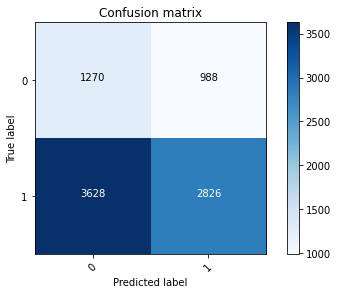

In [ ]:
# SatyLasso Regression with all 52 features before feature selection
cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy" , accuracy)
plot_confusion_matrix(cm,classes)
print(classification_report(Y_test, Y_pred))
print("ROC_AUC_score : %.6f" % (roc_auc_score(Y_test, Y_pred)))

In [ ]:
wt.shape

(52,)

In [ ]:
wt

array([-2.45220790e-05,  3.88757430e-02, -6.39337302e-05, -6.05364436e-05,
        2.77680874e-04,  2.89470668e-04,  2.43869316e-04,  2.19313733e-04,
        2.10181441e-04,  3.22710489e-04,  2.17314081e-04, -6.53859967e-06,
        8.51516984e-06,  7.77063695e-05,  1.47734659e-04, -1.21112127e-04,
       -1.38258852e-04, -3.31782993e-05, -1.99410093e-05,  3.64914985e-05,
       -1.37172490e-04, -2.84025290e-04, -6.74050706e-06,  2.43831955e-04,
        3.61571156e-05, -2.67753896e-04,  2.73454544e-04,  2.39054862e-04,
        2.56415619e-04,  9.95396395e-02, -2.36301557e-04,  1.43099967e-04,
        5.89948753e-05, -2.69629777e-04, -1.51644174e-04, -1.47842202e-04,
       -9.50010730e-05, -8.44639195e-05,  8.27790847e-02, -1.12077268e-04,
        1.40642086e-04,  2.63308568e-04,  5.46652541e-05,  1.79907452e-04,
        2.00038973e-04,  9.83083846e-05,  6.77635139e-05,  2.24355279e-04,
       -2.17815416e-04,  2.09852931e-04, -1.55639248e-04, -2.09764859e-04])

In [ ]:
arr = np.array(wt)
ind = arr.argsort()[-15:][::-1]
ind

array([33,  1, 38, 29, 19, 31,  0,  9,  5, 14, 37, 12, 15, 28, 32])

In [ ]:
ser =  X.columns
features = ser[ind]
new_X = select_columns(X,features)

(26136, 15) (26136,)
Accuracy 0.7486376811594203
              precision    recall  f1-score   support

         0.0       0.59      0.10      0.18      2241
         1.0       0.76      0.97      0.85      6384

    accuracy                           0.75      8625
   macro avg       0.67      0.54      0.51      8625
weighted avg       0.71      0.75      0.68      8625

ROC_AUC_score : 0.539454


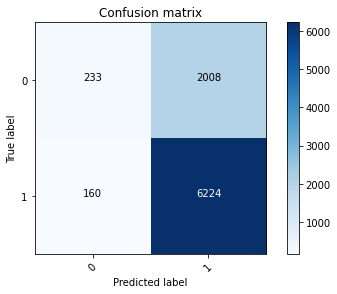

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
predicts["SatyLasso"] = y_pred 
test["SatyLasso"] = y_test
# 35 features - 67.5% / 67
# 30 - 67.5%  / 67.2
# 25 - 66.7%  / 66.8
# 20- 66.7%  / 66.5 / 67%
# 15 - 65.4% / 66.9
# 10 - 63.5 / 65.7 / 65.18

# 2. MI, Feature Importnaces, Lasso, RFE

Index(['secDiffMean', 'Entropy_D_mean', 'cD_Energy_mean', 'cD_std_mean',
       'Entropy_D_max', 'first_diff_mean', 'cD_Energy_max',
       'fractal_dimension', 'Entropy_A_max', 'cD_std_max', 'secDiffMax',
       'cD_Energy_min', 'cA_std_max', 'cD_std_min', 'PMax4', 'Entropy_A_mean',
       'AR1_min', 'Entropy_D_min', 'hjorth_mobility', 'first_diff_max',
       'cA_std_mean', 'AR2_max', 'cA_Energy_max', 'hjorth_complexity', 'PMax2',
       'AR1_max', 'Entropy_A_min', 'AR1_mean', 'hjorth_activity', 'AR2_min',
       'PRatio3', 'AR2_mean', 'kurtosis', 'cA_std_min', 'cD_mean_max',
       'coeff_var', 'PRatio4', 'PMax3', 'cA_Energy_mean', 'cA_mean_max'],
      dtype='object')
(26136, 40) (26136,)
Accuracy 0.5976811594202899
              precision    recall  f1-score   support

         1.0       0.53      0.24      0.33      1637
         2.0       0.61      0.81      0.70      4169
         3.0       0.60      0.49      0.54      2819

    accuracy                           0.60      862

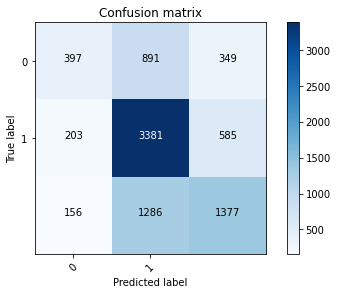

In [ ]:
# configure to select all features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X,y)
arr = mi
ind = arr.argsort()[-40:][::-1]
ser =  X.columns
features = ser[ind]
print(features)
new_X = select_columns(X,features)
(y_test,y_pred) = run_model(new_X,y);
predicts["mi"] = y_pred 
test["mi"] = y_test



# Feature Importances

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(new_X, y)
importance = model.feature_importances_


(26136, 40)


In [ ]:
important_features_dict = {}
for x,i in enumerate(importance):
	important_features_dict[x]=i
important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
ind = important_features_list[0:30]   # take best 30 features
features = new_X.columns[ind]
new_XX = select_columns(new_X,features)
print(new_XX.shape)

(26136, 30)


(26136, 30) (26136,)
Accuracy 0.5935072463768116
              precision    recall  f1-score   support

         1.0       0.51      0.24      0.33      1637
         2.0       0.60      0.80      0.69      4169
         3.0       0.60      0.48      0.53      2819

    accuracy                           0.59      8625
   macro avg       0.57      0.51      0.52      8625
weighted avg       0.58      0.59      0.57      8625



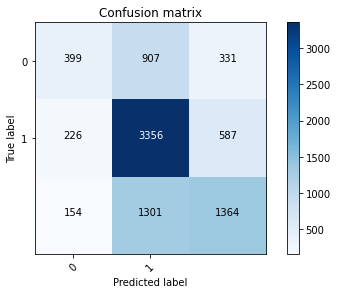

In [ ]:
(y_test,y_pred) = run_model(new_XX,y);
predicts["Feature Importance - Random Forest"] = y_pred 
test["Feature Importance - Random Forest"] = y_test

# Lasso

(26136, 24) (26136,)
Accuracy 0.5942028985507246
              precision    recall  f1-score   support

         1.0       0.53      0.24      0.33      1637
         2.0       0.61      0.81      0.69      4169
         3.0       0.59      0.48      0.53      2819

    accuracy                           0.59      8625
   macro avg       0.58      0.51      0.52      8625
weighted avg       0.59      0.59      0.57      8625



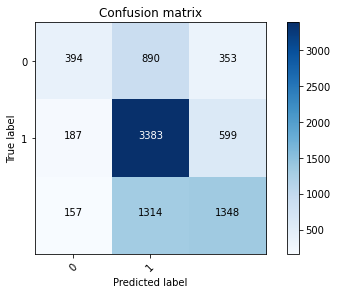

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'),max_features = 24) 
sel_.fit(new_XX, y)
selected_feat = new_XX.columns[(sel_.get_support())]
new_XXX = select_columns(new_XX,selected_feat)

(y_test,y_pred )= run_model(new_XXX,y);
predicts["Lasso"] = y_pred
test["Lasso"] = y_test

# RFE

In [ ]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier()
#model = LogisticRegression()

selector = RFE(model,n_features_to_select=10, step=1)
selector.fit(new_XXX,y)



RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

(26136, 10) (26136,)
Accuracy 0.584463768115942
              precision    recall  f1-score   support

         1.0       0.49      0.25      0.33      1637
         2.0       0.60      0.79      0.68      4169
         3.0       0.57      0.47      0.52      2819

    accuracy                           0.58      8625
   macro avg       0.56      0.50      0.51      8625
weighted avg       0.57      0.58      0.56      8625



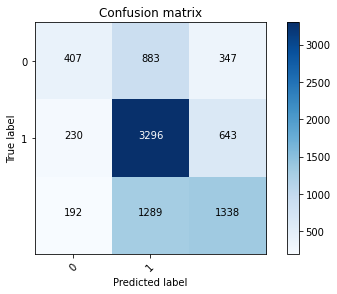

In [ ]:
selected_feat = new_XXX.columns[(selector.get_support())]
new_XXXX = select_columns(new_XXX,selected_feat)

(y_test,y_pred) = run_model(new_XXXX,y);

test["Recursive Feature Elimination"] = y_test
predicts["Recursive Feature Elimination"] = y_pred

# 3. MI,Boruta,Forward Sequential , RFE - 20%

## MI

Index(['cD_std_mean', 'fractal_dimension', 'cD_Energy_mean', 'Entropy_D_mean',
       'first_diff_mean', 'PMax4', 'cA_std_mean', 'Entropy_D_max',
       'secDiffMean', 'kurtosis', 'hjorth_mobility', 'cA_Energy_max',
       'Entropy_A_mean', 'PRatio1', 'AR2_mean', 'cD_mean_max', 'Entropy_A_max',
       'AR3_max', 'cA_std_max', 'PRatio3', 'AR1_max', 'Entropy_D_min',
       'secDiffMax', 'cA_mean_mean', 'AR1_min', 'Entropy_A_min',
       'hjorth_activity', 'cA_Energy_min', 'cD_std_max', 'first_diff_max',
       'AR2_max', 'cD_Energy_min', 'cD_std_min', 'cD_Energy_max', 'PRatio4',
       'cA_std_min', 'coeff_var', 'AR1_mean', 'AR3_mean', 'cA_mean_max'],
      dtype='object')
(5228, 40) (5228,)
Accuracy 0.5463499420625724
              precision    recall  f1-score   support

         1.0       0.40      0.14      0.21       323
         2.0       0.56      0.79      0.66       813
         3.0       0.55      0.43      0.48       590

    accuracy                           0.55      1726
 

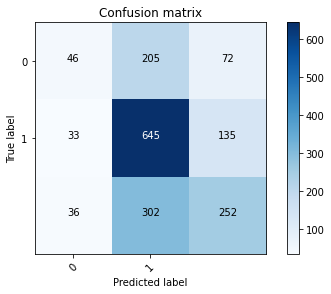

In [ ]:
# configure to select all features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X,y)
arr = mi
ind = arr.argsort()[-40:][::-1]
ser =  X.columns
features = ser[ind]
print(features)
new_X = select_columns(X,features)
(y_test,y_pred) = run_model(new_X,y);
predicts["mi"] = y_pred 
test["mi"] = y_test


## Lasso

In [ ]:
new_X.shape

(5228, 40)

(5228, 26) (5228,)
Accuracy 0.5388180764774044
              precision    recall  f1-score   support

         1.0       0.40      0.13      0.19       323
         2.0       0.55      0.81      0.66       813
         3.0       0.53      0.39      0.45       590

    accuracy                           0.54      1726
   macro avg       0.49      0.44      0.43      1726
weighted avg       0.52      0.54      0.50      1726



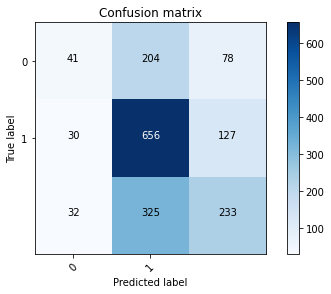

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'),max_features = 28) 
sel_.fit(new_X, y)
selected_feat = new_X.columns[(sel_.get_support())]
new_XX = select_columns(new_X,selected_feat)

(y_test,y_pred )= run_model(new_XX,y);
predicts["Lasso"] = y_pred
test["Lasso"] = y_test

## RFE

In [ ]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier()
#model = LogisticRegression()

selector = RFE(model,n_features_to_select=15, step=1)
selector.fit(new_XX,y)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

(5228, 15) (5228,)
Accuracy 0.5434530706836617
              precision    recall  f1-score   support

         1.0       0.38      0.14      0.21       323
         2.0       0.56      0.80      0.66       813
         3.0       0.55      0.41      0.47       590

    accuracy                           0.54      1726
   macro avg       0.50      0.45      0.44      1726
weighted avg       0.52      0.54      0.51      1726



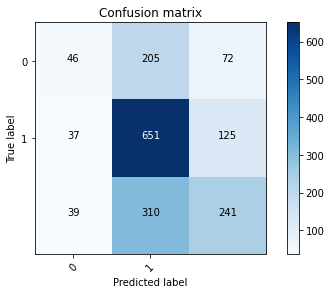

In [ ]:
selected_feat = new_XX.columns[(selector.get_support())]
new_XXX = select_columns(new_XX,selected_feat)

(y_test,y_pred) = run_model(new_XXX,y);

test["Recursive Feature Elimination"] = y_test
predicts["Recursive Feature Elimination"] = y_pred

## Foward/ Backward sequnetial

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# after rfe
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
sfs1 = sfs(clf,
           k_features=10,   # 15 features to select   
           forward=True,   # forward seelction
           floating=True,  #  floating algorithm
           verbose=2,
           scoring='accuracy',
           cv=0)
sfs1.fit(np.array(new_XXX), y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   17.4s finished

[2021-02-05 15:38:14] Features: 1/10 -- score: 0.9992348890589136[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   14.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s finished

[2021-02-05 15:38:30] Features: 2/10 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  1

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
 

In [ ]:
features = sfs1.k_feature_names_
features = np.array(features)
fet = new_XXX.columns
features

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14'], dtype='<U2')

In [ ]:
features = fet[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]

In [ ]:
new_XXXX = sfs1.transform(new_XXX)

new_XXXX = select_columns(new_XXX,features)
(y_test,y_pred) = run_model(new_XXXX,y);
predicts["Sequential"] = y_pred 
test["Sequential"] = y_test

IndexError: ignored

## Backward

In [ ]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
sfs1 = sfs(clf,
           k_features=10,   # 15 features to select   
           forward=False,   # forward seelction
           floating=True,  #  floating algorithm
           verbose=2,
           scoring='accuracy',
           cv=0)
sfs1.fit(np.array(new_XXX), y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   25.2s finished

[2021-02-05 15:32:40] Features: 14/10 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   23.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished

[2021-02-05 15:33:06] Features: 13/10 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
 

In [ ]:
features = sfs1.k_feature_names_
features = np.array(features)
fet = new_XXX.columns
features

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

(5228, 10) (5228,)
Accuracy 0.5202780996523755
              precision    recall  f1-score   support

         1.0       0.37      0.12      0.18       323
         2.0       0.54      0.79      0.64       813
         3.0       0.51      0.36      0.42       590

    accuracy                           0.52      1726
   macro avg       0.47      0.42      0.41      1726
weighted avg       0.50      0.52      0.48      1726



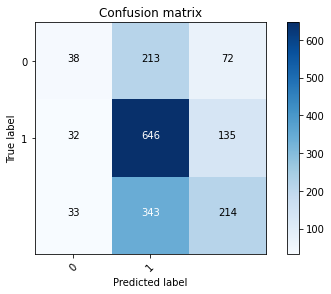

In [ ]:
features = fet[[0,1,2,3,4,5,6,7,8,9]]

new_XXXX = sfs1.transform(new_XXX)
new_XXXX = select_columns(new_XXX,features)

(y_test,y_pred) = run_model(new_XXXX,y);
predicts["Sequential"] = y_pred 
test["Sequential"] = y_test

# 4. MI, RFE, Sequential Floating forward

Index(['cD_std_mean', 'cD_Energy_mean', 'Entropy_D_mean', 'first_diff_mean',
       'PMax4', 'cA_std_mean', 'Entropy_D_max', 'secDiffMean', 'kurtosis',
       'hjorth_mobility', 'cA_Energy_max', 'Entropy_A_mean', 'PRatio1',
       'AR2_mean', 'cD_mean_max', 'Entropy_A_max', 'fractal_dimension',
       'AR3_max', 'cA_std_max', 'PRatio3', 'AR1_max', 'Entropy_D_min',
       'secDiffMax', 'AR1_min', 'Entropy_A_min', 'hjorth_activity',
       'cA_Energy_min', 'cD_std_max', 'first_diff_max', 'AR2_max',
       'cD_Energy_min', 'cD_std_min', 'cD_Energy_max', 'PRatio4', 'cA_std_min',
       'AR1_mean', 'cD_mean_mean', 'AR3_mean', 'cA_mean_max', 'PRatio2'],
      dtype='object')
(5228, 40) (5228,)
Accuracy 0.5515643105446119
              precision    recall  f1-score   support

         1.0       0.41      0.15      0.21       323
         2.0       0.57      0.79      0.66       813
         3.0       0.55      0.44      0.49       590

    accuracy                           0.55      1726
   

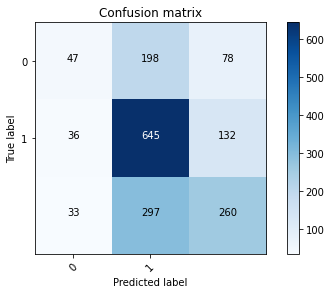

In [ ]:
# configure to select all features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X,y)
arr = mi
ind = arr.argsort()[-40:][::-1]
ser =  X.columns
features = ser[ind]
print(features)
new_X = select_columns(X,features)
(y_test,y_pred) = run_model(new_X,y);
predicts["mi"] = y_pred 
test["mi"] = y_test


### RFE

In [ ]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier()
#model = LogisticRegression()

selector = RFE(model,n_features_to_select=28, step=1)
selector.fit(new_X,y)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=28, step=1, verbose=0)

(5228, 28) (5228,)
Accuracy 0.5509849362688297
              precision    recall  f1-score   support

         1.0       0.42      0.15      0.22       323
         2.0       0.57      0.79      0.66       813
         3.0       0.55      0.44      0.48       590

    accuracy                           0.55      1726
   macro avg       0.51      0.46      0.46      1726
weighted avg       0.53      0.55      0.52      1726



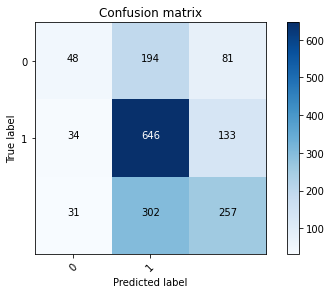

In [ ]:
selected_feat = new_X.columns[(selector.get_support())]
new_XX = select_columns(new_X,selected_feat)

(y_test,y_pred) = run_model(new_XX,y);

test["Recursive Feature Elimination"] = y_test
predicts["Recursive Feature Elimination"] = y_pred

# Sequebtial floating forward

In [ ]:
# after rfe
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
sfs1 = sfs(clf,
           k_features=15,   # 15 features to select   
           forward=True,   # forward seelction
           floating=True,  #  floating algorithm
           verbose=2,
           scoring='accuracy',
           cv=0)
sfs1.fit(np.array(new_XX), y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   32.2s finished

[2021-02-05 15:51:57] Features: 1/15 -- score: 0.9994261667941852[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   27.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s finished

[2021-02-05 15:52:27] Features: 2/15 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  2

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
 

In [ ]:
features = sfs1.k_feature_names_
features = np.array(features)
fet = new_XX.columns
features

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14'], dtype='<U2')

In [ ]:
features = fet[[0,1,2,3,4,5,6,7,8,9,10,11,12]]

(5228, 13) (5228,)
Accuracy 0.5318655851680185
              precision    recall  f1-score   support

         1.0       0.41      0.15      0.22       323
         2.0       0.55      0.79      0.65       813
         3.0       0.51      0.39      0.44       590

    accuracy                           0.53      1726
   macro avg       0.49      0.44      0.44      1726
weighted avg       0.51      0.53      0.50      1726



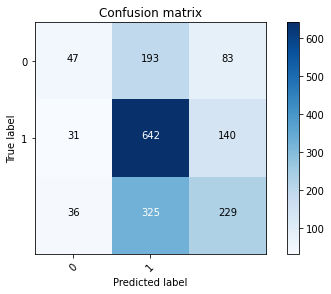

In [ ]:
new_XXX = sfs1.transform(new_XX)

new_XXX = select_columns(new_XX,features)
(y_test,y_pred) = run_model(new_XXX,y);
predicts["Sequential"] = y_pred 
test["Sequential"] = y_test